In [2]:
import numpy as np
from IPython import get_ipython
from IPython.display import display_html
from PIL.Image import fromarray


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print(f"<array of shape {obj.shape}>")

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)


_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; }
</style>
"""


def guess(x):
    display_html(
        _style_inline + f"<h4>Answer is: <span class='einops-answer'>{tuple(x)}</span> (hover to see)</h4>",
        raw=True,
    )

In [4]:
%matplotlib inline

In [5]:
display_np_arrays_as_images()

In [7]:
ims = np.load("./resources/test_images.npy", allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)


(6, 96, 96, 3) float64


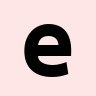

In [16]:
ims[0]

In [12]:
import einops

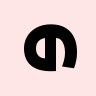

In [21]:
# Transpose (swap h<>w)
einops.rearrange(ims[0], 'h w c -> w h c')

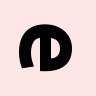

In [22]:
# Rotate by 90 degrees clockwise: tranpose and flip horizontally
einops.rearrange(ims[0], 'h w c -> w h c')[:, ::-1, :]

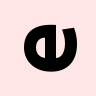

In [24]:
# Rotate by 90 degrees anti-clockwise: tranpose and flip vertically
einops.rearrange(ims[0], 'h w c -> w h c')[::-1, :, :]

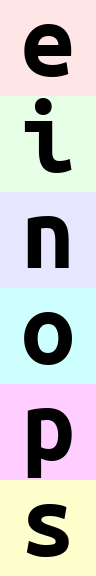

In [26]:
# Stack all the images vertically
einops.rearrange(ims, 'b h w c -> (b h ) w c')

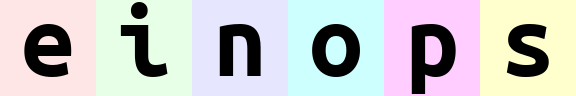

In [27]:
# Stack all the images vertically
einops.rearrange(ims, 'b h w c -> h (b w) c')

In [30]:
einops.rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c', b1=2)

<array of shape (2, 3, 96, 96, 3)>


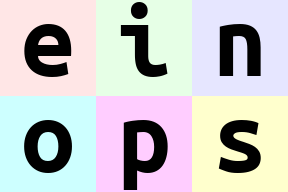

In [32]:
einops.rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

In [47]:
einops.rearrange(ims, "b h (w1 w2) c -> (h) (b w1 w2) c", w2=2).shape

(96, 576, 3)

In [55]:
a = einops.rearrange(ims, "b h (w1 w2) c -> (h w2) (b w1) c", w2=2)

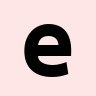

In [60]:
einops.rearrange(a, "(h1 h2) (b w) c -> b h1 (w h2) c", h2=2, b=6)[0, ...]

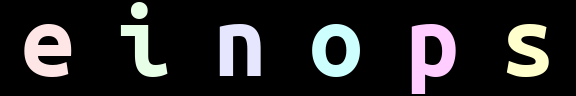

In [70]:
einops.rearrange(einops.reduce(ims, 'b h w c -> b () () c', 'max') - ims, 'b h w c -> h (b w) c')

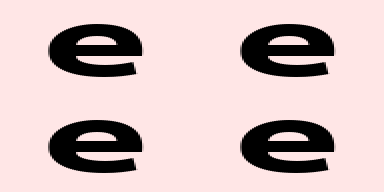

In [80]:
einops.repeat(ims[0], 'h w c -> (2 h) (2 w 2) c')

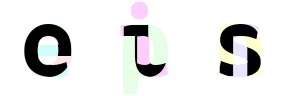

In [88]:
h, w, c = ims.shape[1:]
a = ims.reshape(2, 3, h, w, c)
a.max(axis=0).transpose(1, 0, 2, 3).reshape(h, 3 * w, c)

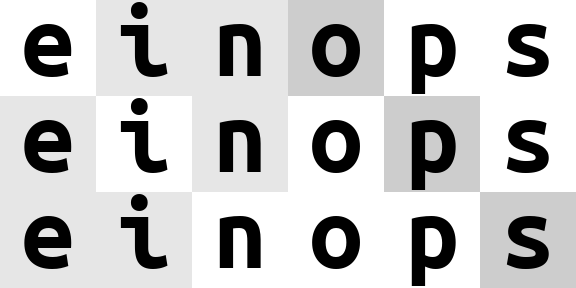

In [90]:
einops.rearrange(ims, 'b h w c -> (c h) (b w)')

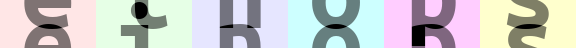

In [95]:
einops.reduce(ims, "b (h1 h2) w c -> h2 (b w) c", "mean", h1=2)

## multiple tensors

a = np.ones((16, 4, 128))
b = np.ones((44, 128))

In [ ]:
a = np.ones((16, 4, 128))
b = np.ones((44, 128))

In [106]:
print(b.shape)
print(a.shape)

(44, 128)
(16, 4, 128)


In [104]:
c = a @ b.T
c.shape

(16, 4, 44)

In [100]:
c.shape

(16, 4, 44)

In [108]:
c2 = einops.einsum(a, b, 'b s d, o d -> b s o')
c2.shape

(16, 4, 44)

In [119]:
a = np.ones((16, 10, 10, 3))
b = np.ones((100, 100))
a2 = einops.rearrange(a, 'b h w c -> b c (h w)')
o = einops.einsum(a2, b, 'b c d, o d -> b c o')
o = einops.rearrange(o, 'b c (h w) -> b h w c', h=a.shape[1])